In [25]:
#DECLARAÇÃO DE BIBLIOTECAS 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

Text(0.5, 1.0, 'Dados originais')

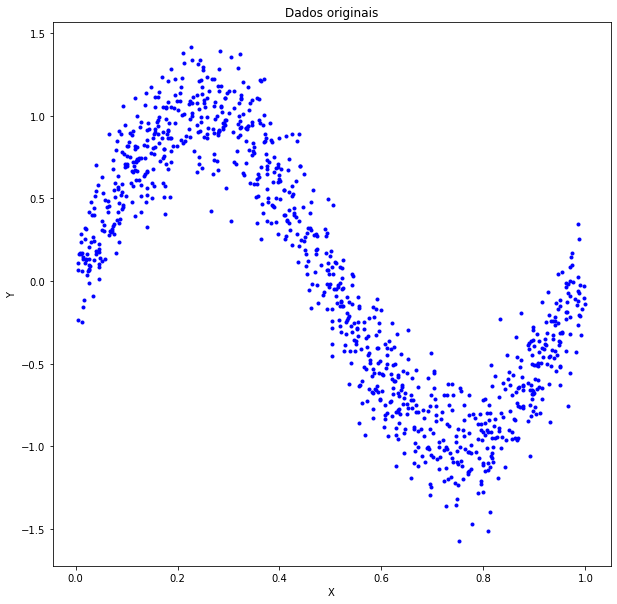

In [5]:
#GERAÇÃO DE DADOS

#leitura do arquivo
df = pd.read_csv('poly_reg_p.csv', header=None)

#organização
x = df[0].to_numpy()
y = df[1].to_numpy()


#plot
fig = plt.figure(figsize=(10,10))
plt.plot(x, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dados originais')

VALIDAÇÃO CRUZADA (70,30)

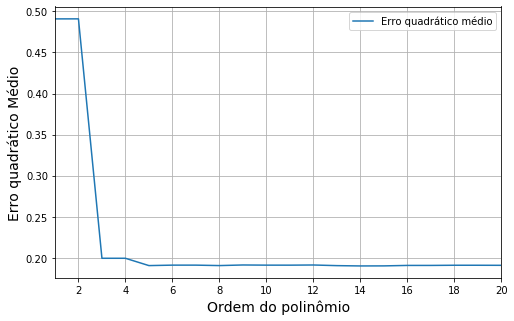

In [34]:
#reshape de x e y

x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

#divisao do conjunto de dados em conjuntos de treinamento e validação
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#inicialização vetores erro e desvio padrao
erro = []
desvio_padrao = []


#busca pelo melhor grau de polinômio
for d in range(1, 21):
    
    #cria o modelo
    poly_features = PolynomialFeatures(degree=d, include_bias=True)
    
    #cria um definidor de escala
    std_scaler = StandardScaler()
    
    #cria o regressor linear 
    lin_reg = LinearRegression()

    #cria as ações
    regressor_polinomial = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    regressor_polinomial.fit(x_train, y_train)
    
    y_pred = regressor_polinomial.predict(x_test)
    
    erro.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    
#plot dos resultados
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), erro,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro quadrático Médio', fontsize=14)
plt.xticks(range(0, 22, 2))
plt.xlim([1, 20])
plt.legend()
plt.grid()
plt.show()

VALIDAÇÃO K-FOLD

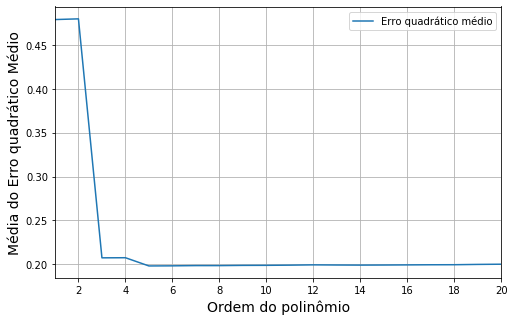

In [36]:
#cria o K-fold
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

#inicialização dos vetores de erro e desvio padrão
erro = []
desvio_padrao = []

#busca pelo melhor grau de polinomio
for d in range(1, 21):
    
    #cria o modelo
    poly_features = PolynomialFeatures(degree=d, include_bias=True)
    
    #cria um definidor de escala
    std_scaler = StandardScaler()
    
    #cria um regressor linear
    lin_reg = LinearRegression()

    #cria as ações
    regressor_polinomial = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    desempenho = cross_val_score(regressor_polinomial, x, y, scoring='neg_mean_squared_error', cv=kfold)
        
    valores = np.sqrt(-desempenho)
    erro.append(valores.mean())
    desvio_padrao.append(valores.std())
    
#plot dos resultados
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), erro,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média do Erro quadrático Médio', fontsize=14)
plt.xticks(range(0, 22, 2))
plt.xlim([1, 20])
plt.legend()
plt.grid()
plt.show()

LEAVE-ONE-OUT

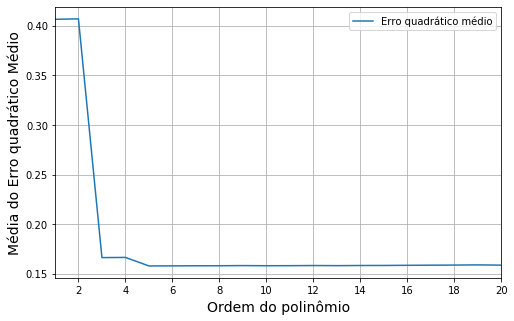

In [39]:
#cria o Leave-one-out
loocv = LeaveOneOut()

#inicialização dos vetores de erro e desvio padrão
erro = []
desvio_padrao = []

#busca pelo melhor grau de polinomio
for d in range(1, 21):
    
    #cria o modelo
    poly_features = PolynomialFeatures(degree=d, include_bias=True)
    
    #cria um definidor de escala
    std_scaler = StandardScaler()
    
    #cria um regressor linear
    lin_reg = LinearRegression()

    #cria as ações
    regressor_polinomial = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    desempenho = cross_val_score(regressor_polinomial, x, y, scoring='neg_mean_squared_error', cv=loocv)
        
    valores = np.sqrt(-desempenho)
    erro.append(valores.mean())
    desvio_padrao.append(valores.std())
    
#plot dos resultados
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), erro,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média do Erro quadrático Médio', fontsize=14)
plt.xticks(range(0, 22, 2))
plt.xlim([1, 20])
plt.legend()
plt.grid()
plt.show()

ANALISANDO OS 3 MÉTODOS DE VALIDAÇÃO CRUZADA, PODE-SE CONCLUIR QUE O MELHOR GRAU DE POLINÔMIO QUE MELHOR REPRESENTA OS DADOS DO ARQUIVO É CINCO(5)

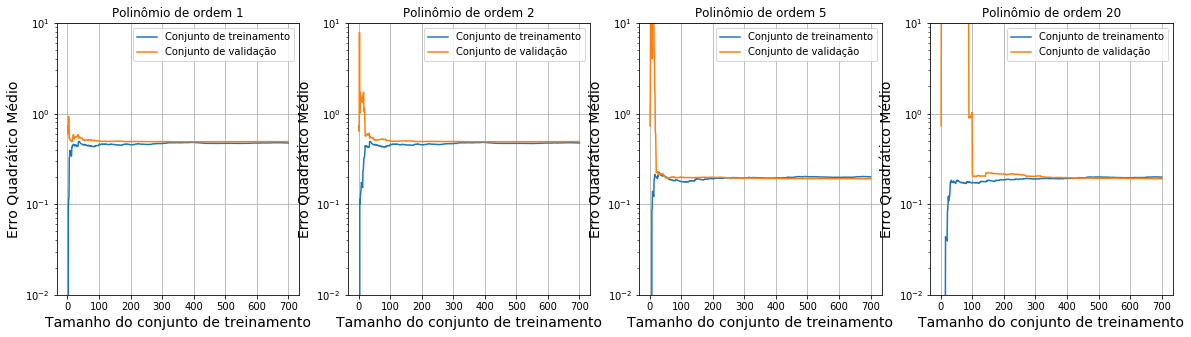

In [41]:
#PLOT DAS CURVAS DE APRENDIZADO PARA OS POLINÔMIOS DE GRAU 1, 2, 5 E 20

#definição dos graus
graus = [1, 2, 5, 20]

plt.figure(figsize=(20, 5))
for i in range(len(graus)):
    ax = plt.subplot(1, len(graus), i + 1)

    #cria o modelo
    poly_features = PolynomialFeatures(degree=graus[i], include_bias=True)
    
    #cria um definidor de escala
    std_scaler = StandardScaler()
    
    #cria o regressor linear
    lin_reg = LinearRegression()

    #cria as ações
    regressao_polinomial = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    #cria os vetores de erro
    error_treinamento = []
    error_validacao = []
    
    for m in range(1,len(x_train)+1):

        #realiza a regressao
        regressao_polinomial.fit(x_train[:m], y_train[:m])

        #utiliza o modelo para predicao do conjunto de treinamento
        y_train_pred = regressao_polinomial.predict(x_train[:m])

        #utiliza o modelo para predicao do conjunto de validacao
        y_test_pred = regressao_polinomial.predict(x_test)       

        #calcula o erro quadrádico médio para o conjunto de treinamento
        error_treinamento.append(mean_squared_error(y_train[:m], y_train_pred))

        #calcula o erro quadradico médio para o conjunto de validação
        error_validacao.append(mean_squared_error(y_test, y_test_pred))       

    plt.plot(range(1,len(x_train)+1), np.sqrt(error_treinamento), label='Conjunto de treinamento')
    plt.plot(range(1,len(x_train)+1), np.sqrt(error_validacao), label='Conjunto de validação')
    plt.yscale('log')
    plt.xlabel('Tamanho do conjunto de treinamento', fontsize=14)
    plt.ylabel('Erro Quadrático Médio', fontsize=14)
    plt.grid()
    plt.ylim([1e-2, 10])
    plt.title('Polinômio de ordem '+str(graus[i]))
    plt.legend(loc='best')
    
plt.show()

CONCLUSÕES:

O POLINÔMIO DE GRAU 5 APRESENTA UM ERRO QUADRÁTICO MÉDIO MENOR QUANDO COMPARADO AOS POLINÔMIOS DE GRAU 1 E 2. APESAR DO POLINÔMIO DE GRAU 20 APRESENTAR UM MSE PARECIDO COM UM POLINÔMIO DE GRAU 5, ELE DEPENDE DE UM CONJUNTO DE TREINAMENTO MAIOR, O QUE NÃO É INTERESSANTE DEPENDENDO DO CENÁRIO EM QUE ESSE MODELO SERÁ EMPREGADO. O POLINÔMIO DE GRAU 5 APRESENTA UMA GENERALIZAÇÃO MUITO SUPERIOR AO GRAU 20 QUANDO O CONJUNTO DE TREINAMENTO É MUITO PEQUENO (ATÉ 100 AMOSTRAS).

In [45]:
#TREINAMENTO DO MODELO PARA O POLINÔMIO DE GRAU 5

#cria o polinômio
poly_features = PolynomialFeatures(degree=5, include_bias=True)

#cria um definidor de escala
std_scaler = StandardScaler()

#cria um regressor linear
lin_reg = LinearRegression()

#cria as ações
regressao_polinomial = Pipeline([
    ("poly_features", poly_features),
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg),
])

#treina o modelo
regressao_polinomial.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Text(0.5, 1.0, 'Dados originais')

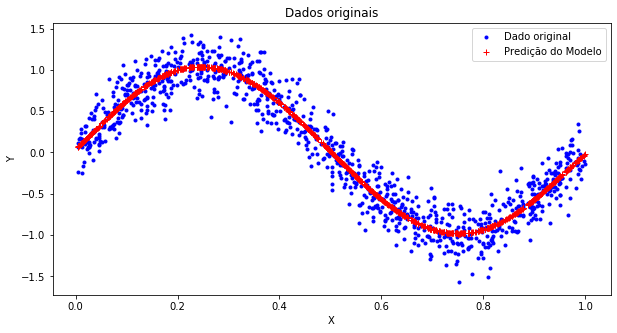

In [47]:
#COMPARAÇÃO DADOS ORIGINAIS E MODELO

y_pred = regressao_polinomial.predict(x)

plt.figure(figsize=(10,5))
plt.plot(x, y, 'b.', label = 'Dado original')
plt.plot(x, y_pred, 'r+', label = 'Predição do Modelo')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')
plt.title('Dados originais')